# Problem Statement

**Problem Statement**

The dataset that will be used contains the usage behavior of around **9000** credit card users for **six months**. It is required to group credit card customers into several groups according to customer's usage behavior to get an effective and efficient credit card marketing strategy.

# Dataset Description

**CUST_ID**: A special number given to each credit card user, like a customer number.

**BALANCE**: The amount of money left on the credit card that the person can still spend.

**BALANCE_FREQUENCY**: How often the balance (money left) is updated.

*   If it’s close to 1, it’s updated often.
*   If it’s close to 0, it’s updated rarely.



**PURCHASES**: The total amount of money the person has spent using the credit card.

**PURCHASES_FREQUENCY**: How often the person buys things with the credit card.

*   1 means very often
*   0 means rarely

**ONEOFF_PURCHASES**: The biggest amount of money the person spent in a single purchase.

**ONEOFF_PURCHASES_FREQUENCY**: How often the person makes one-time (single) purchases.

*   1 means often
*   0 means rarely

**INSTALLMENTS_PURCHASES**: The amount of money spent on purchases where payments were broken into smaller, regular amounts (installments).

**PURCHASES_INSTALLMENTS_FREQUENCY**: How often the person buys things using installment payments.

*   1 means often
*   0 means rarely

**CASH_ADVANCE**: The amount of cash the person took out using their credit card, like borrowing cash.

**CASH_ADVANCE_FREQUENCY**: How often the person takes cash advances from their credit card.

*   1 means often
*   0 means rarely

**CASH_ADVANCE_TRX**: The number of times the person took out cash advances.

**PURCHASES_TRX**: The number of times the person made purchases using the credit card.

**CREDIT_LIMIT**: The maximum amount of money the credit card allows the person to spend.

**PAYMENTS**: The total amount of money the person has paid back to the credit card company.

**MINIMUM_PAYMENTS**: The smallest amount of money the person paid back on their credit card bill.

**PRC_FULL_PAYMENT**: The percentage of the credit card bill the person paid in full.
*   If it’s 0, they didn’t pay in full
*   If it’s 1, they paid everything

**TENURE**: How long the person has been using the credit card, usually measured in months.

# Exploratory Data Analysis

In [1]:
#importing neccesssary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
cl_df=pd.read_csv("/content/Customer_Data.csv")
cl_df.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

We can see that 'cust_id' is the unique id given to a customer and is not a valuable column for our usecase.

In [3]:
# Copying dataset to save
df=cl_df.copy()

In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

We can see that only 'cust_id' is a categorical variable and all other variables are numerical.

In [6]:
#Removing column 'cust_id'
df=df.drop(['cust_id'],axis=1)

Checking Missing values

In [7]:
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

We can see that there are **1** and **313** missing values in 'credit_limit' and 'minimum_payments' columns respectively. Which we need to handle before applying PCA.

Missing values can significantly impact Principal Component Analysis (PCA). PCA relies on complete data to calculate the covariance matrix and perform dimensionality reduction.

It affects in following ways:


*   **Covariance Matrix**: Missing values disrupt the computation of the
     covariance matrix. PCA needs this matrix to identify the principal components.
*   **Bias**: If data is missing non-randomly, it can introduce bias into the
     analysis, leading to incorrect conclusions.



In [8]:
#Let's see some statistical measures of the feature columns
df.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

We can clearly see that features are not in same scale and also some features vary too much compared to others(from standard deviation).

Also see that cash_advance_frequency has maximum value 1.5 which is not possible so we will first remove values > 1.

In [9]:
rows_with_high_cash_advance_frequency = df[df['cash_advance_frequency'] > 1]
num_rows = len(rows_with_high_cash_advance_frequency)
print(f"Number of rows with CASH_ADVANCE_FREQUENCY > 1: {num_rows}")

Number of rows with CASH_ADVANCE_FREQUENCY > 1: 8


In [10]:
df = df[df['cash_advance_frequency'] <= 1]

# Handling missing values

In [11]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=d126ef9b990b4ee9f908c645831d033c6390cb0ccb353a45ee92f5ab45738239
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=1fe6ecfdc169c4e99aa50c047539c6f0c7373fd1d940206c47dd60375ff4d4a2
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [12]:
# Lets impute the missing value
from fancyimpute import KNN
knn=KNN(k=5)
df_knn=pd.DataFrame(knn.fit_transform(df),columns=df.columns)

Imputing row 1/8942 with 0 missing, elapsed time: 30.247
Imputing row 101/8942 with 0 missing, elapsed time: 30.249
Imputing row 201/8942 with 0 missing, elapsed time: 30.250
Imputing row 301/8942 with 0 missing, elapsed time: 30.251
Imputing row 401/8942 with 0 missing, elapsed time: 30.253
Imputing row 501/8942 with 0 missing, elapsed time: 30.254
Imputing row 601/8942 with 0 missing, elapsed time: 30.254
Imputing row 701/8942 with 0 missing, elapsed time: 30.255
Imputing row 801/8942 with 0 missing, elapsed time: 30.256
Imputing row 901/8942 with 0 missing, elapsed time: 30.258
Imputing row 1001/8942 with 1 missing, elapsed time: 30.259
Imputing row 1101/8942 with 0 missing, elapsed time: 30.261
Imputing row 1201/8942 with 0 missing, elapsed time: 30.262
Imputing row 1301/8942 with 0 missing, elapsed time: 30.263
Imputing row 1401/8942 with 0 missing, elapsed time: 30.264
Imputing row 1501/8942 with 0 missing, elapsed time: 30.264
Imputing row 1601/8942 with 0 missing, elapsed time:

In [13]:
df_knn.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [14]:
#Let's again see the statistical measures of the feature columns
df_knn.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8942.000000        8942.000000   8942.000000       8942.000000   
mean    1561.672808           0.877180   1003.971150        592.836192   
std     2079.666731           0.236985   2137.433159       1660.572134   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.037855           0.888889     39.807500          0.000000   
50%      871.427704           1.000000    362.305000         38.000000   
75%     2046.646301           1.000000   1110.945000        578.510000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8942.000000   8942.000000          8942.000000   
mean               411.435408    976.429967             0.490658   
std                904.658971   2095.738507             0.401396   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.515000      0.000000             0.500000   
75%                469.105000   1112.108085             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8942.000000                       8942.000000   
mean                     0.202508                          0.364763   
std                      0.298435                          0.397476   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8942.000000       8942.000000    8942.000000   8942.000000   
mean                 0.134198          3.234959      14.721315   4492.075108   
std                  0.197658          6.809168      24.865736   3638.309608   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.000000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8942.000000       8942.000000       8942.000000  8942.000000  
mean    1733.484810        853.440990          0.153852    11.520689  
std     2895.898767       2352.601073          0.292594     1.333105  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.241920        166.200074          0.000000    12.000000  
50%      857.298191        300.072340          0.000000    12.000000  
75%     1902.779562        802.805443          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# Principal Component Analysis

## For non-scaled sample

In [15]:
# Defining covariance matrix
covariance_matrix = df_knn.cov()
covariance_matrix

balance  balance_frequency  \
balance                           4.325014e+06         158.864336   
balance_frequency                 1.588643e+02           0.056162   
purchases                         8.092574e+05          67.798941   
oneoff_purchases                  5.695857e+05          41.098100   
installments_purchases            2.394324e+05          26.689858   
cash_advance                      2.162788e+06          49.156760   
purchases_frequency              -6.411075e+01           0.021891   
oneoff_purchases_frequency        4.573587e+01           0.014321   
purchases_installments_frequency -5.129817e+01           0.016627   
cash_advance_frequency            1.843526e+02           0.009008   
cash_advance_trx                  5.439530e+03           0.227491   
purchases_trx                     8.029663e+03           1.118819   
credit_limit                      4.016174e+06          82.579866   
payments                          1.949176e+06          44.645516   
minimum_payments                  1.959489e+06          76.878776   
prc_full_payment                 -1.939398e+02          -0.006581   
tenure                            2.130257e+02           0.038321   

                                     purchases  oneoff_purchases  \
balance                           8.092574e+05      5.695857e+05   
balance_frequency                 6.779894e+01      4.109810e+01   
purchases                         4.568621e+06      3.254209e+06   
oneoff_purchases                  3.254209e+06      2.757500e+06   
installments_purchases            1.314583e+06      4.965759e+05   
cash_advance                     -2.289597e+05     -1.082518e+05   
purchases_frequency               3.370700e+02      1.765172e+02   
oneoff_purchases_frequency        3.179453e+02      2.601259e+02   
purchases_installments_frequency  2.679397e+02      8.419519e+01   
cash_advance_frequency           -5.060142e+01     -2.704469e+01   
cash_advance_trx                 -9.685570e+02     -5.178144e+02   
purchases_trx                     3.664651e+04      2.252363e+04   
credit_limit                      2.779596e+06      1.933747e+06   
payments                          3.734560e+06      2.728304e+06   
minimum_payments                  4.771398e+05      1.951033e+05   
prc_full_payment                  1.127134e+02      6.445474e+01   
tenure                            2.439280e+02      1.409854e+02   

                                  installments_purchases  cash_advance  \
balance                                     2.394324e+05  2.162788e+06   
balance_frequency                           2.668986e+01  4.915676e+01   
purchases                                   1.314583e+06 -2.289597e+05   
oneoff_purchases                            4.965759e+05 -1.082518e+05   
installments_purchases                      8.184079e+05 -1.209456e+05   
cash_advance                               -1.209456e+05  4.392120e+06   
purchases_frequency                         1.606036e+02 -1.808950e+02   
oneoff_purchases_frequency                  5.777901e+01 -5.436197e+01   
purchases_installments_frequency            1.838237e+02 -1.468315e+02   
cash_advance_frequency                     -2.357872e+01  2.614770e+02   
cash_advance_trx                           -4.514094e+02  9.365416e+03   
purchases_trx                               1.412759e+04 -3.928351e+03   
credit_limit                                8.457418e+05  2.316369e+06   
payments                                    1.006336e+06  2.753817e+06   
minimum_payments                            2.819224e+05  6.942474e+05   
prc_full_payment                            4.827954e+01 -9.352173e+01   
tenure                                      1.029654e+02 -1.843611e+02   

                                  purchases_frequency  \
balance                                    -64.110753   
balance_frequency                            0.021891   
purchases                                  337.069990   
oneoff_pur

In [16]:
#Calculating eigen values and eigen vector pairs
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Pair eigenvalues and eigenvectors
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Print the sorted eigen pairs
for i in range(len(eigen_pairs)):
  print(f"Eigenvalue {i+1}: {eigen_pairs[i][0]}")
  print(f"Eigenvector {i+1}: {eigen_pairs[i][1]}")
  print("\n")


Eigenvalue 1: 20893459.512961905
Eigenvector 1: [2.91429747e-01 8.45975768e-06 2.92974701e-01 2.10999463e-01
 8.19696755e-02 2.15994004e-01 1.30180717e-05 2.27596379e-05
 8.50954292e-06 1.01180530e-05 4.03527191e-04 2.34462912e-03
 6.89313730e-01 4.87670252e-01 1.35498935e-01 2.32746057e-06
 3.96984703e-05]


Eigenvalue 2: 7805805.084051023
Eigenvector 2: [ 3.03040029e-01  4.69491106e-06 -5.00567536e-01 -3.80488747e-01
 -1.20118830e-01  2.05525301e-01 -3.70458181e-05 -2.85459131e-05
 -3.00959344e-05  1.91747815e-05  5.05190282e-04 -3.50893138e-03
  4.42588590e-01 -4.68355575e-01  2.02246973e-01 -2.58476190e-05
 -1.33776869e-06]


Eigenvalue 3: 6205174.6031544665
Eigenvector 3: [ 2.71865910e-01  1.20148320e-05 -7.94980903e-02 -6.57122834e-02
 -1.38120047e-02  3.75619370e-01 -2.86994966e-05 -2.68938177e-05
 -1.55523199e-05  2.71901784e-05  9.43910502e-04 -8.15976709e-04
 -5.08868790e-01  2.86045057e-01  6.58330778e-01 -2.68418951e-05
 -2.37437214e-05]


Eigenvalue 4: 5022587.186436487
Ei

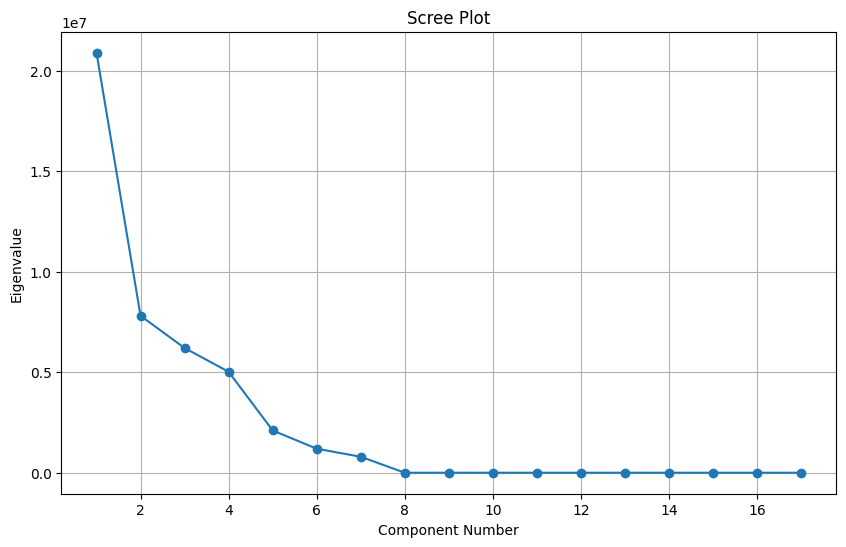

In [17]:
#Let's see the Scree Plot to estimate the number of PC's to be considered for explaining variability
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [18]:
# Verifying same thing from proportion of eigen values
sum_ev=np.sum(eigenvalues)
sum=0
for i in range(len(eigenvalues)):
  sum+=eigenvalues[i]
  print(f"Upto {i+1}th principal components variance explained is {(sum/sum_ev)*100}")

Upto 1th principal components variance explained is 47.462927905123685
Upto 2th principal components variance explained is 65.19509732952748
Upto 3th principal components variance explained is 79.29117149309589
Upto 4th principal components variance explained is 90.70080393712186
Upto 5th principal components variance explained is 95.47992088971304
Upto 6th principal components variance explained is 98.1950744826517
Upto 7th principal components variance explained is 99.99920183225666
Upto 8th principal components variance explained is 99.99986500728664
Upto 9th principal components variance explained is 99.99992344999073
Upto 10th principal components variance explained is 99.99999535637181
Upto 11th principal components variance explained is 99.9999991564444
Upto 12th principal components variance explained is 99.99999957482622
Upto 13th principal components variance explained is 99.99999972292196
Upto 14th principal components variance explained is 99.9999998655553
Upto 15th princip

Clearly we can see that 1st 4 PC's can explain upto 90% of the variablity present in the data.

First we need to normalize the eigenvectors before finding Principal components.

Let's see the 4 Principal components

In [19]:
# Extract the first 4 eigenvectors
first_4_eigenvectors = [eigen_pairs[i][1] for i in range(4)]

# Normalize the first 4 eigenvectors
normalized_eigenvectors = []
for eigenvector in first_4_eigenvectors:
  normalized_eigenvector = eigenvector / np.linalg.norm(eigenvector)
  normalized_eigenvectors.append(normalized_eigenvector)

# Print the normalized eigenvectors
for i, normalized_eigenvector in enumerate(normalized_eigenvectors):
  print(f"Normalized Eigenvector {i+1}: {normalized_eigenvector}")


Normalized Eigenvector 1: [2.91429747e-01 8.45975768e-06 2.92974701e-01 2.10999463e-01
 8.19696755e-02 2.15994004e-01 1.30180717e-05 2.27596379e-05
 8.50954292e-06 1.01180530e-05 4.03527191e-04 2.34462912e-03
 6.89313730e-01 4.87670252e-01 1.35498935e-01 2.32746057e-06
 3.96984703e-05]
Normalized Eigenvector 2: [ 3.03040029e-01  4.69491106e-06 -5.00567536e-01 -3.80488747e-01
 -1.20118830e-01  2.05525301e-01 -3.70458181e-05 -2.85459131e-05
 -3.00959344e-05  1.91747815e-05  5.05190282e-04 -3.50893138e-03
  4.42588590e-01 -4.68355575e-01  2.02246973e-01 -2.58476190e-05
 -1.33776869e-06]
Normalized Eigenvector 3: [ 2.71865910e-01  1.20148320e-05 -7.94980903e-02 -6.57122834e-02
 -1.38120047e-02  3.75619370e-01 -2.86994966e-05 -2.68938177e-05
 -1.55523199e-05  2.71901784e-05  9.43910502e-04 -8.15976709e-04
 -5.08868790e-01  2.86045057e-01  6.58330778e-01 -2.68418951e-05
 -2.37437214e-05]
Normalized Eigenvector 4: [ 4.17645082e-02  9.70489602e-06  3.02032890e-01  1.92338792e-01
  1.09711394e-

In [20]:
# All the 4 principal components
# principal_components=df_knn.dot(np.array(normalized_eigenvectors).T)
# principal_components
pc1=np.dot(df_knn,normalized_eigenvectors[0])
pc2=np.dot(df_knn,normalized_eigenvectors[1])
pc3=np.dot(df_knn,normalized_eigenvectors[2])
pc4=np.dot(df_knn,normalized_eigenvectors[3])

In [21]:
df_pca=pd.DataFrame({'pc1':pc1,'pc2':pc2,'pc3':pc3,'pc4':pc4})
df_pca.head()

pc1          pc2          pc3          pc4
0   854.324594   329.462937  -357.084892   156.572403
1  9296.357964  3687.985637  1608.265572 -3721.149875
2  6675.059800  3229.813960 -2659.552438  1426.724603
3  6509.280342  2626.373716 -3242.384117  1721.230948
4  1437.521813   496.612476   -35.470445    66.628452

In [22]:
df_pca.shape

(8942, 4)

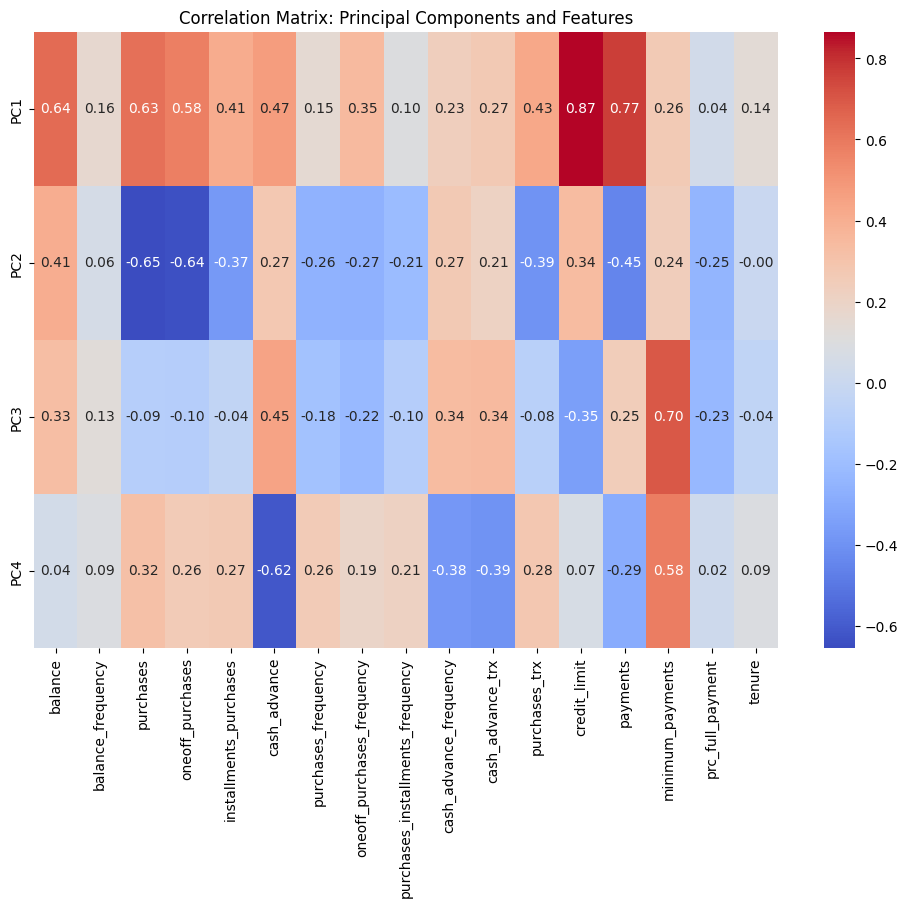

In [23]:
#Let's see the correlation between each feature and principal component
corr = np.zeros((4, 17))
for i in range(4):
  for j in range(17):
    rho = (normalized_eigenvectors[i][j] * (math.sqrt(eigenvalues[i]))) / (math.sqrt(covariance_matrix.iloc[j, j]))
    corr[i, j] = round(rho, 3)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=df_knn.columns, yticklabels=[f"PC{i+1}" for i in range(4)])
plt.title('Correlation Matrix: Principal Components and Features')
plt.show()


In [24]:
df.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8942.000000        8942.000000   8942.000000       8942.000000   
mean    1561.672808           0.877180   1003.971150        592.836192   
std     2079.666731           0.236985   2137.433159       1660.572134   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.037855           0.888889     39.807500          0.000000   
50%      871.427704           1.000000    362.305000         38.000000   
75%     2046.646301           1.000000   1110.945000        578.510000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8942.000000   8942.000000          8942.000000   
mean               411.435408    976.429967             0.490658   
std                904.658971   2095.738507             0.401396   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.515000      0.000000             0.500000   
75%                469.105000   1112.108085             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8942.000000                       8942.000000   
mean                     0.202508                          0.364763   
std                      0.298435                          0.397476   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8942.000000       8942.000000    8942.000000   8941.000000   
mean                 0.134198          3.234959      14.721315   4492.308258   
std                  0.197658          6.809168      24.865736   3638.446283   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.000000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8942.000000       8629.000000       8942.000000  8942.000000  
mean    1733.484810        864.081082          0.153852    11.520689  
std     2895.898767       2373.487974          0.292594     1.333105  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.241920        169.009640          0.000000    12.000000  
50%      857.298191        311.637186          0.000000    12.000000  
75%     1902.779562        823.904160          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## For scaled sample

In [25]:
#Let's scale them first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_knn_scaled = pd.DataFrame(scaler.fit_transform(df_knn), columns=df_knn.columns)

In [26]:
# Now new covariance matrix which is ofcourse is correlation matrix
correlation_matrix = df_knn_scaled.corr()
correlation_matrix

balance  balance_frequency  purchases  \
balance                           1.000000           0.322339   0.182054   
balance_frequency                 0.322339           1.000000   0.133847   
purchases                         0.182054           0.133847   1.000000   
oneoff_purchases                  0.164933           0.104434   0.916843   
installments_purchases            0.127264           0.124492   0.679846   
cash_advance                      0.496230           0.098975  -0.051113   
purchases_frequency              -0.076800           0.230129   0.392875   
oneoff_purchases_frequency        0.073691           0.202494   0.498437   
purchases_installments_frequency -0.062058           0.176518   0.315380   
cash_advance_frequency            0.448478           0.192301  -0.119772   
cash_advance_trx                  0.384126           0.140978  -0.066549   
purchases_trx                     0.155275           0.189862   0.689507   
credit_limit                      0.530786           0.095775   0.357429   
payments                          0.323649           0.065054   0.603342   
minimum_payments                  0.400498           0.137892   0.094887   
prc_full_payment                 -0.318719          -0.094902   0.180226   
tenure                            0.076838           0.121297   0.085606   

                                  oneoff_purchases  installments_purchases  \
balance                                   0.164933                0.127264   
balance_frequency                         0.104434                0.124492   
purchases                                 0.916843                0.679846   
oneoff_purchases                          1.000000                0.330554   
installments_purchases                    0.330554                1.000000   
cash_advance                             -0.031106               -0.063792   
purchases_frequency                       0.264823                0.442280   
oneoff_purchases_frequency                0.524900                0.214011   
purchases_installments_frequency          0.127561                0.511217   
cash_advance_frequency                   -0.082397               -0.131862   
cash_advance_trx                         -0.045795               -0.073281   
purchases_trx                             0.545481                0.628032   
credit_limit                              0.320068                0.256953   
payments                                  0.567351                0.384127   
minimum_payments                          0.049941                0.132464   
prc_full_payment                          0.132658                0.182395   
tenure                                    0.063687                0.085377   

                                  cash_advance  purchases_frequency  \
balance                               0.496230            -0.076800   
balance_frequency                     0.098975             0.230129   
purchases                            -0.051113             0.392875   
oneoff_purchases                     -0.031106             0.264823   
installments_purchases               -0.063792             0.442280   
cash_advance                          1.000000            -0.215038   
purchases_frequency                  -0.215038             1.000000   
oneoff_purchases_frequency           -0.086918             0.501301   
purchases_installments_frequency     -0.176267             0.862886   
cash_advance_frequency                0.631222            -0.308408   
cash_advance_trx                      0.656290            -0.202474   
purchases_trx                        -0.075383             0.568302   
credit_limit                          0.303788             0.120551   
payments                              0.453748             0.103322   
minimum_payments                      0.140808             0.005058   
prc_full_payment                     -0.152514             0.305555   
tenure                               -0.065988        

In [27]:
#Calculating eigen values and eigen vector pairs
eigenvalues_scaled, eigenvectors_scaled = np.linalg.eig(correlation_matrix)

# Pair eigenvalues and eigenvectors
eigen_pairs_scaled = [(eigenvalues_scaled[i], eigenvectors_scaled[:, i]) for i in range(len(eigenvalues_scaled))]

# Print the sorted eigen pairs
for i in range(len(eigen_pairs_scaled)):
  print(f"Eigenvalue {i+1}: {eigen_pairs_scaled[i][0]}")
  print(f"Eigenvector {i+1}: {eigen_pairs_scaled[i][1]}")
  print("\n")


Eigenvalue 1: 4.640085464383498
Eigenvector 1: [-0.10323784 -0.12107336 -0.41165654 -0.34647954 -0.33669811  0.02163922
 -0.32083926 -0.29454646 -0.27407136  0.08707955  0.04674839 -0.39056868
 -0.21279915 -0.26695282 -0.06297103 -0.13135528 -0.08031552]


Eigenvalue 2: 3.45450435130577
Eigenvector 2: [-4.03046763e-01 -1.31239211e-01 -3.85088326e-02 -6.05186437e-02
  2.01934452e-02 -4.39089432e-01  1.91977897e-01  1.98827504e-02
  1.79208349e-01 -4.35066337e-01 -4.19678985e-01  2.13138408e-02
 -2.36490877e-01 -2.56123398e-01 -1.69996278e-01  1.90570323e-01
 -7.09784193e-05]


Eigenvalue 3: 1.5009937647411884
Eigenvector 3: [ 0.16265509  0.42439059 -0.25683767 -0.38955007  0.10832476  0.01995353
  0.36950915 -0.11523905  0.46732384  0.10241842  0.10713341  0.07549639
 -0.10136472 -0.27853049  0.24073227 -0.12857127  0.07332552]


Eigenvalue 4: 1.2727067472788842
Eigenvector 4: [ 0.27777685  0.15806277  0.0457065   0.09245048 -0.0618038  -0.26162272
 -0.19750703  0.04169366 -0.23267629 -

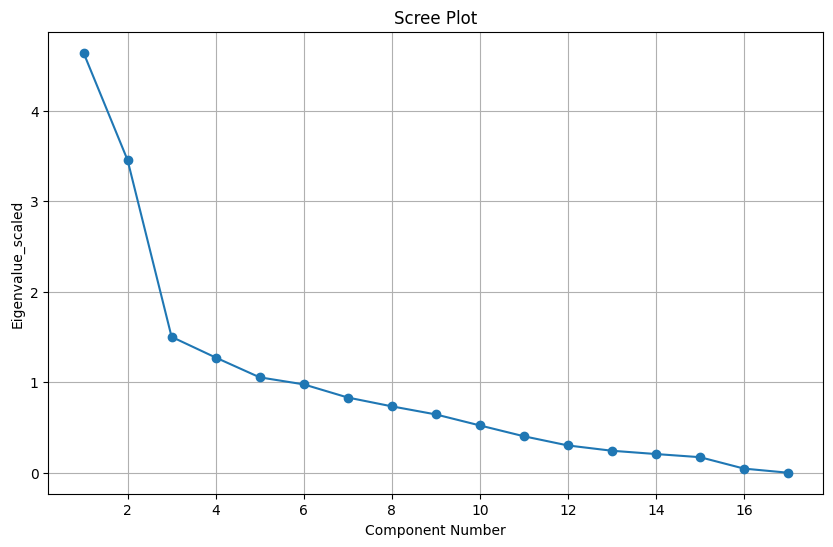

In [28]:
#Let's see the Scree Plot to estimate the number of PC's to be considered for explaining variability
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_scaled) + 1), eigenvalues_scaled, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue_scaled')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [29]:
# Verifying same thing from proportion of eigen values
sum_ev_scaled=np.sum(eigenvalues_scaled)
sum=0
for i in range(len(eigenvalues_scaled)):
  sum+=eigenvalues_scaled[i]
  print(f"Upto {i+1}th principal components for scaled features variance explained is {(sum/sum_ev_scaled)*100}")

Upto 1th principal components for scaled features variance explained is 27.29462037872648
Upto 2th principal components for scaled features variance explained is 47.615234209936915
Upto 3th principal components for scaled features variance explained is 56.444609296649794
Upto 4th principal components for scaled features variance explained is 63.93111957476088
Upto 5th principal components for scaled features variance explained is 70.13035463311965
Upto 6th principal components for scaled features variance explained is 75.8730541324959
Upto 7th principal components for scaled features variance explained is 80.76053616227958
Upto 8th principal components for scaled features variance explained is 85.0752544033704
Upto 9th principal components for scaled features variance explained is 88.86421804443987
Upto 10th principal components for scaled features variance explained is 91.93831612561482
Upto 11th principal components for scaled features variance explained is 94.30803928217195
Upto 12t

Clearly we can see that first 10 Principal components can explain upto 90% variability in the dataset.

And 6 eigenvalues are greater than or approximately equal to 1.(Will be used later)

Again we need to normalize the eigenvectors before finding Principal components.

In [30]:
# Extract the first 6 eigenvectors
first_6_eigenvectors = [eigen_pairs_scaled[i][1] for i in range(6)]

# Normalize the first 6 eigenvectors
normalized_eigenvectors_scaled = []
for eigenvector_scaled in first_6_eigenvectors:
  normalized_eigenvector_scaled = eigenvector_scaled / np.linalg.norm(eigenvector_scaled)
  normalized_eigenvectors_scaled.append(normalized_eigenvector_scaled)

# Print the normalized eigenvectors
for i, normalized_eigenvector_scaled in enumerate(normalized_eigenvectors_scaled):
  print(f"Normalized Eigenvector {i+1}: {normalized_eigenvector_scaled}")

Normalized Eigenvector 1: [-0.10323784 -0.12107336 -0.41165654 -0.34647954 -0.33669811  0.02163922
 -0.32083926 -0.29454646 -0.27407136  0.08707955  0.04674839 -0.39056868
 -0.21279915 -0.26695282 -0.06297103 -0.13135528 -0.08031552]
Normalized Eigenvector 2: [-4.03046763e-01 -1.31239211e-01 -3.85088326e-02 -6.05186437e-02
  2.01934452e-02 -4.39089432e-01  1.91977897e-01  1.98827504e-02
  1.79208349e-01 -4.35066337e-01 -4.19678985e-01  2.13138408e-02
 -2.36490877e-01 -2.56123398e-01 -1.69996278e-01  1.90570323e-01
 -7.09784193e-05]
Normalized Eigenvector 3: [ 0.16265509  0.42439059 -0.25683767 -0.38955007  0.10832476  0.01995353
  0.36950915 -0.11523905  0.46732384  0.10241842  0.10713341  0.07549639
 -0.10136472 -0.27853049  0.24073227 -0.12857127  0.07332552]
Normalized Eigenvector 4: [ 0.27777685  0.15806277  0.0457065   0.09245048 -0.0618038  -0.26162272
 -0.19750703  0.04169366 -0.23267629 -0.26245569 -0.33090316 -0.02065622
  0.12973931 -0.11444667  0.38961373 -0.41859327  0.4293

Let's see first 6 Pricipal Components.

In [31]:
dict_df={}
for i in range(6):
  dict_df[f"pc{i+1}"]=np.dot(df_knn_scaled,normalized_eigenvectors_scaled[i])
df_pca_scaled=pd.DataFrame(dict_df)
df_pca_scaled.head()

pc1       pc2       pc3       pc4       pc5       pc6
0  1.688070  1.065298 -0.467987  0.682690 -0.052681 -0.060398
1  1.129459 -2.521799 -0.606123 -0.131815 -0.649870  1.086895
2 -0.967794  0.387680 -0.082886  1.261953  2.162930  0.315022
3  0.887390 -0.015373 -1.482580  1.098316 -0.255084  0.180162
4  1.603160  0.677269 -0.337799  1.021439  0.439131 -0.075476

In [32]:
df_pca_scaled.shape

(8942, 6)

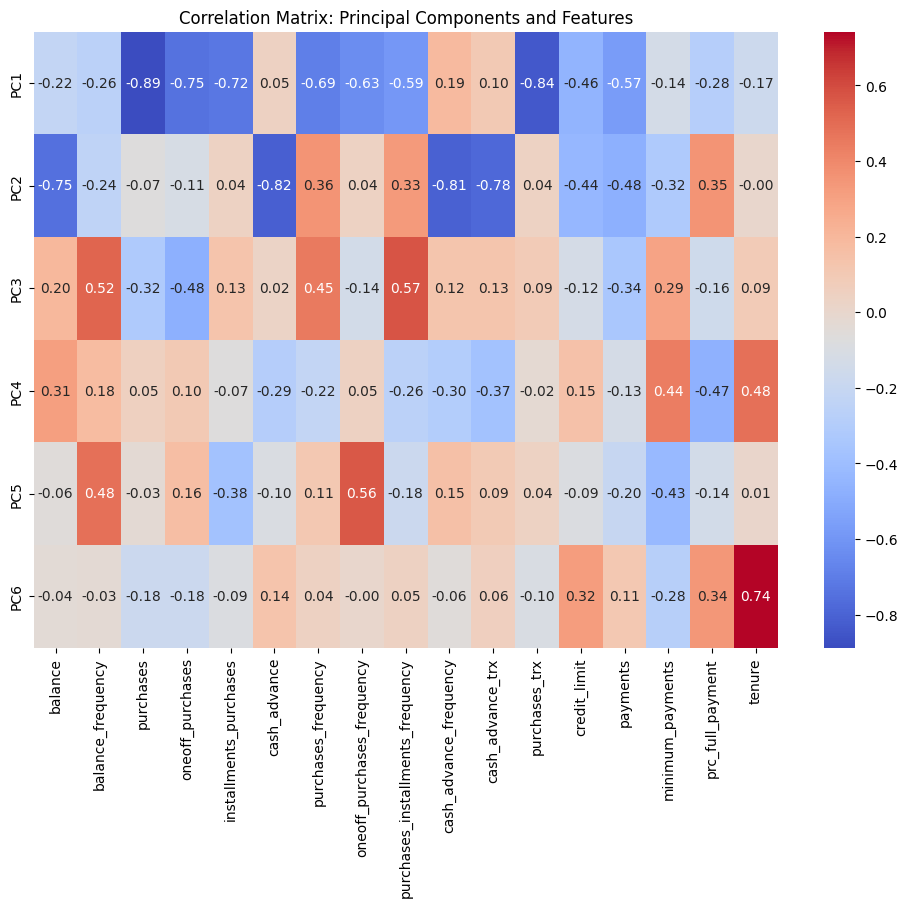

In [33]:
#Let's see the correlation between each feature and principal components
corr = np.zeros((6, 17))
for i in range(6):
  for j in range(17):
    rho=(normalized_eigenvectors_scaled[i][j]*(math.sqrt(eigenvalues_scaled[i])))
    corr[i, j] = round(rho, 3)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=df_knn_scaled.columns, yticklabels=[f"PC{i+1}" for i in range(6)])
plt.title('Correlation Matrix: Principal Components and Features')
plt.show()

In [34]:
df_knn_scaled.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count  8.942000e+03       8.942000e+03  8.942000e+03      8.942000e+03   
mean  -1.169670e-15      -2.933710e-14 -1.516121e-15     -7.310437e-16   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -7.509665e-01      -3.701627e+00 -4.697351e-01     -3.570272e-01   
25%   -6.893966e-01       4.941287e-02 -4.511100e-01     -3.570272e-01   
50%   -3.319203e-01       5.182923e-01 -3.002209e-01     -3.341422e-01   
75%    2.332107e-01       5.182923e-01  5.005061e-02     -8.627745e-03   
max    8.406368e+00       5.182923e-01  2.247475e+01      2.419086e+01   

       installments_purchases  cash_advance  purchases_frequency  \
count            8.942000e+03  8.942000e+03         8.942000e+03   
mean             3.798249e-16  9.058586e-17        -3.957172e-16   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.548216e-01 -4.659382e-01        -1.222447e+00   
25%             -4.548216e-01 -4.659382e-01        -1.014828e+00   
50%             -3.558672e-01 -4.659382e-01         2.327462e-02   
75%              6.375089e-02  6.474362e-02         1.061377e+00   
max              2.441782e+01  2.202725e+01         1.268997e+00   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                8.942000e+03                      8.942000e+03   
mean                -7.933414e-15                      1.543138e-15   
std                  1.000056e+00                      1.000056e+00   
min                 -6.786039e-01                     -9.177506e-01   
25%                 -6.786039e-01                     -9.177506e-01   
50%                 -3.993549e-01                     -4.984137e-01   
75%                  3.266968e-01                      9.692615e-01   
max                  2.672398e+00                      1.598266e+00   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count            8.942000e+03      8.942000e+03   8.942000e+03  8.942000e+03   
mean            -8.062141e-15     -1.589226e-18   1.271380e-17 -1.271380e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -6.789784e-01     -4.751153e-01  -5.920653e-01 -1.220986e+00   
25%             -6.789784e-01     -4.751153e-01  -5.518470e-01 -7.949397e-01   
50%             -6.789784e-01     -4.751153e-01  -3.105376e-01 -4.101241e-01   
75%              4.453598e-01      1.123609e-01   9.164467e-02  5.519149e-01   
max              4.380548e+00      1.758978e+01   1.380606e+01  7.011320e+00   

           payments  minimum_payments  prc_full_payment        tenure  
count  8.942000e+03      8.942000e+03      8.942000e+03  8.942000e+03  
mean   8.263973e-17      4.068417e-16     -3.744215e-15  2.161347e-16  
std    1.000056e+00      1.000056e+00      1.000056e+00  1.000056e+00  
min   -5.986334e-01     -3.627770e-01     -5.258510e-01 -4.141457e+00  
25%   -4.662865e-01     -2.921359e-01     -5.258510e-01  3.595650e-01  
50%   -3.025781e-01     -2.352288e-01     -5.258510e-01  3.595650e-01  
75%    5.846345e-02     -2.152442e-02     -3.758037e-02  3.595650e-01  
max    1.691728e+01      3.211636e+01      2.892047e+00  3.595650e-01

When we scale features, typically by standardizing them (subtracting the mean and dividing by the standard deviation), we ensure that each feature has a mean of 0 and a standard deviation of 1. This process is crucial for PCA because:

**Equal Variance**: By scaling, we give each feature the same variance. This means that no single feature will dominate the principal components due to having a larger scale or range of values.

**Balanced Contribution**: In the context of PCA, the principal components are derived from the covariance matrix of the features. If the features are not scaled, those with larger variances will disproportionately influence the principal components. Scaling ensures that each feature contributes equally to the covariance matrix, and thus to the principal components.

**Interpretability**: When features are scaled, the resulting principal components are more interpretable because they are not biased by the original scales of the features. This allows for a more balanced representation of the data structure.

In summary, scaling ensures that each feature contributes equally to the formation of the principal components by standardizing their variances. This leads to a more balanced and fair analysis in PCA.

**Visualization using Biplot**

In [36]:
from sklearn.decomposition import PCA


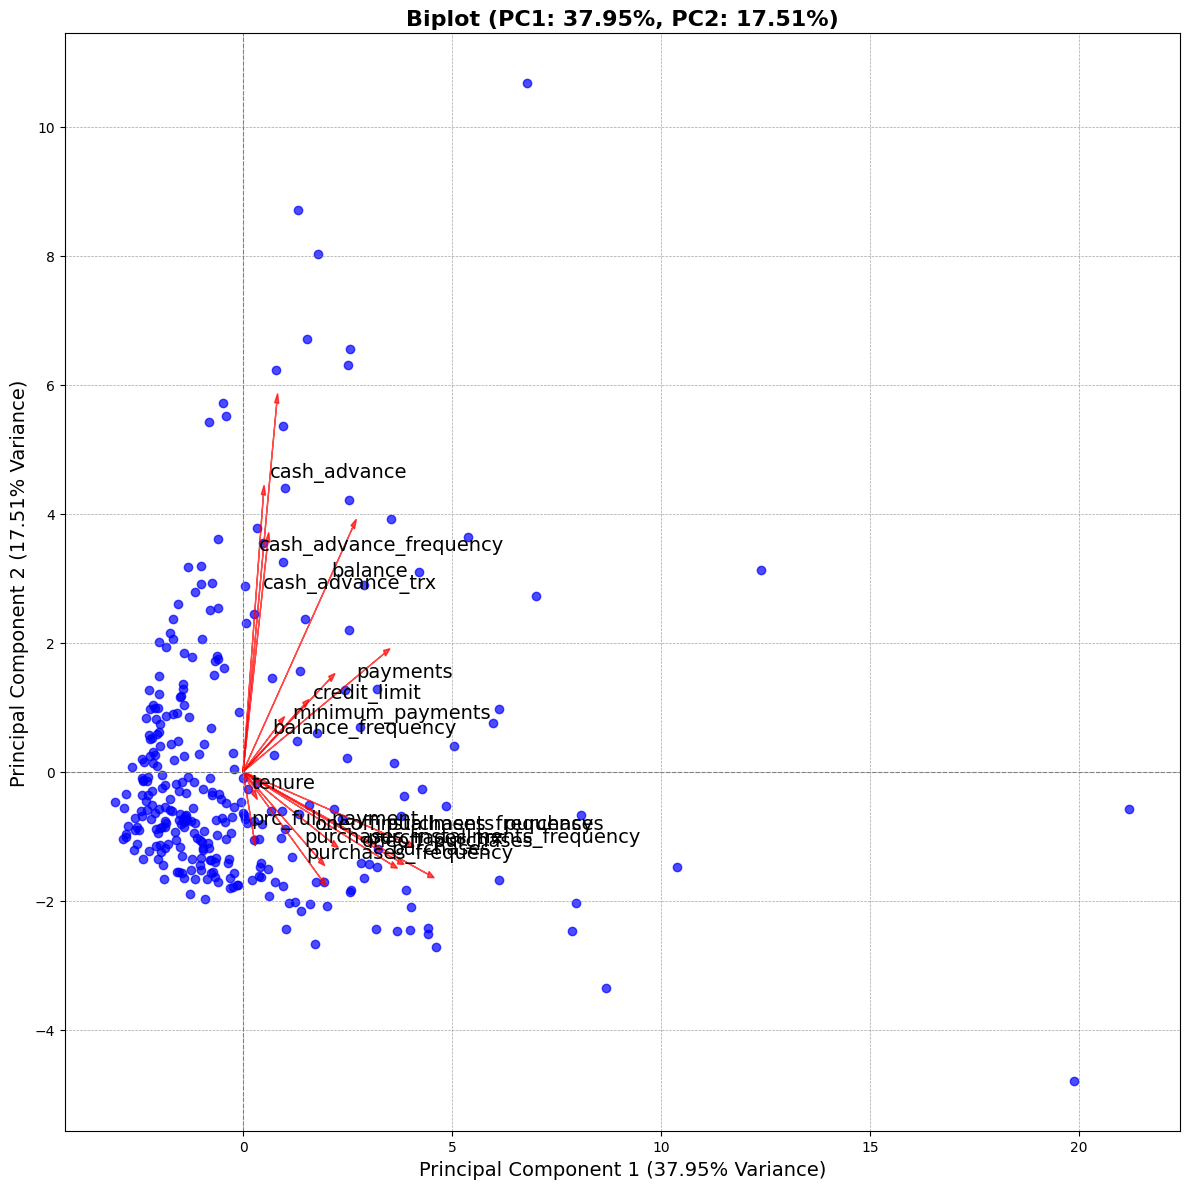

In [37]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for biplot
principal_components = pca.fit_transform(df_knn_scaled.iloc[:300,:])
pc1_var = pca.explained_variance_ratio_[0]*100
pc2_var = pca.explained_variance_ratio_[1]*100

# reate a biplot
plt.figure(figsize=(12, 12))
plt.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    alpha=0.7,
    color="blue",
    label="Samples"
)

loadings = pca.components_.T  # Transpose to align with original features
arrow_scaling = 10  # Scale arrows for better visibility
text_offset = 8  # Increase offset for variable names
for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0] * arrow_scaling, loadings[i, 1] * arrow_scaling,
              color="red", alpha=0.7, head_width=0.1, head_length=0.15)
    plt.text(loadings[i, 0] * text_offset, loadings[i, 1] * text_offset, feature,
             color="black", fontsize=14)

# Customize the plot
plt.axhline(0, color="gray", linewidth=0.8, linestyle="--")
plt.axvline(0, color="gray", linewidth=0.8, linestyle="--")
plt.title(f"Biplot (PC1: {pc1_var:.2f}%, PC2: {pc2_var:.2f}%)", fontsize=16, fontweight="bold")
plt.xlabel(f"Principal Component 1 ({pc1_var:.2f}% Variance)", fontsize=14)
plt.ylabel(f"Principal Component 2 ({pc2_var:.2f}% Variance)", fontsize=14)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

Based on the directions and relationships of different features in the biplot, we can group customers into various behaviors:

- *High-Balance & Cash-Advance Users*:
  - Customers located along the *Balance, **Cash Advance, and **Cash Advance Frequency* vectors are likely to:
    - Carry larger balances on their credit cards.
    - Frequently use cash advances.
  - This grouping suggests these customers may rely on cash advances and carry higher outstanding balances.

- *High-Purchasers*:
  - Customers along the *Purchases* and *Purchases Frequency* vectors tend to:
    - Use their credit card often for purchases.
    - Accumulate a high total amount spent.
  - This indicates that these users might be regular card users with frequent transaction activity.

- *Frequent Minimum Payers*:
  - Customers along the *Minimum Payments* and *Payments* vectors are more likely to:
    - Make regular payments to their credit card.
    - Often just cover the minimum payment due on their bills.
  - These users may be managing their debt by meeting minimum requirements, possibly indicating a more cautious or budget-constrained approach to credit card usage.

# Factor Analysis

## Using Maximum Likelihood

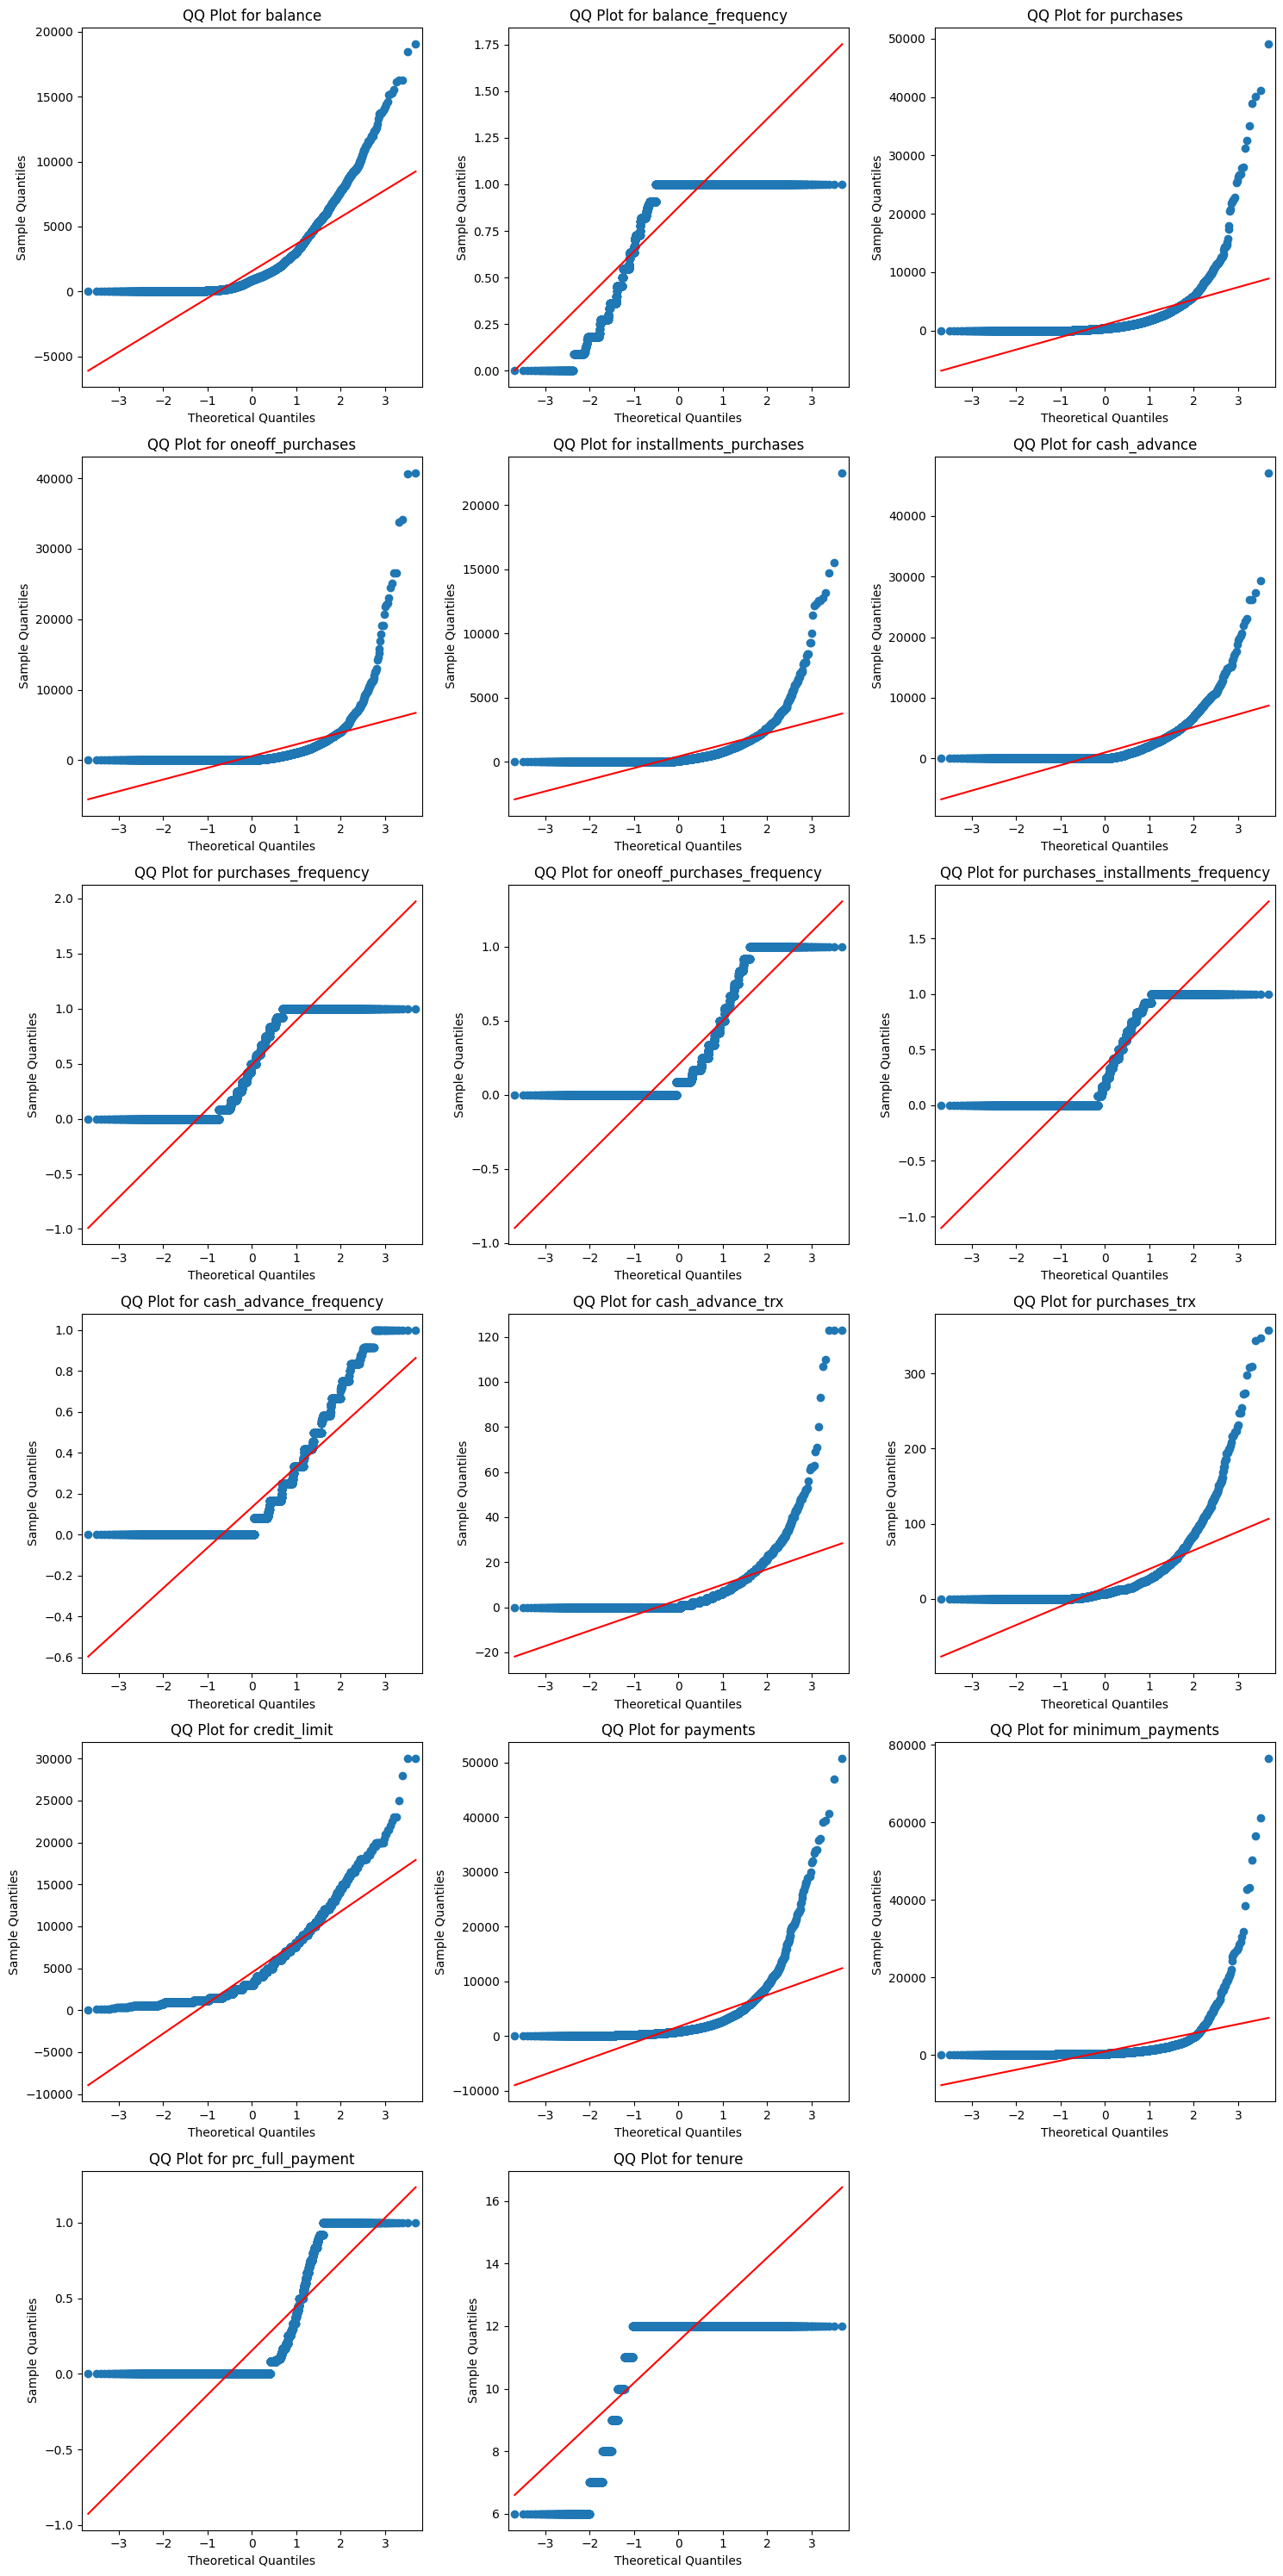

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

def plot_qq_plots_side_by_side(df):

  num_cols = len(df.columns)
  num_rows = (num_cols + 2) // 3  # Distribute plots across 3 columns

  fig, axes = plt.subplots(num_rows, min(3, num_cols), figsize=(15, 5 * num_rows))
  axes = axes.flatten()

  for i, col in enumerate(df.columns):
    qqplot(df[col], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {col}')

  # Remove any empty subplots if there are fewer than num_rows*3 plots
  for i in range(num_cols, len(axes)):
      fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()

plot_qq_plots_side_by_side(df_knn)

In [39]:
from scipy.stats import boxcox

def apply_boxcox_transformation(df):
  """Applies Box-Cox transformation to each column of the DataFrame.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A new DataFrame with Box-Cox transformed columns.
  """
  transformed_df = df.copy()
  for column in df.columns:
    # Handle negative values by adding a constant or other suitable method
    if (df[column] <= 0).any():
      transformed_df[column], _ = boxcox(df[column] + 1)
    else:
      transformed_df[column], _ = boxcox(df[column])

  return transformed_df

# Assuming df_knn_scaled is your DataFrame
df_boxcox = apply_boxcox_transformation(df_knn)

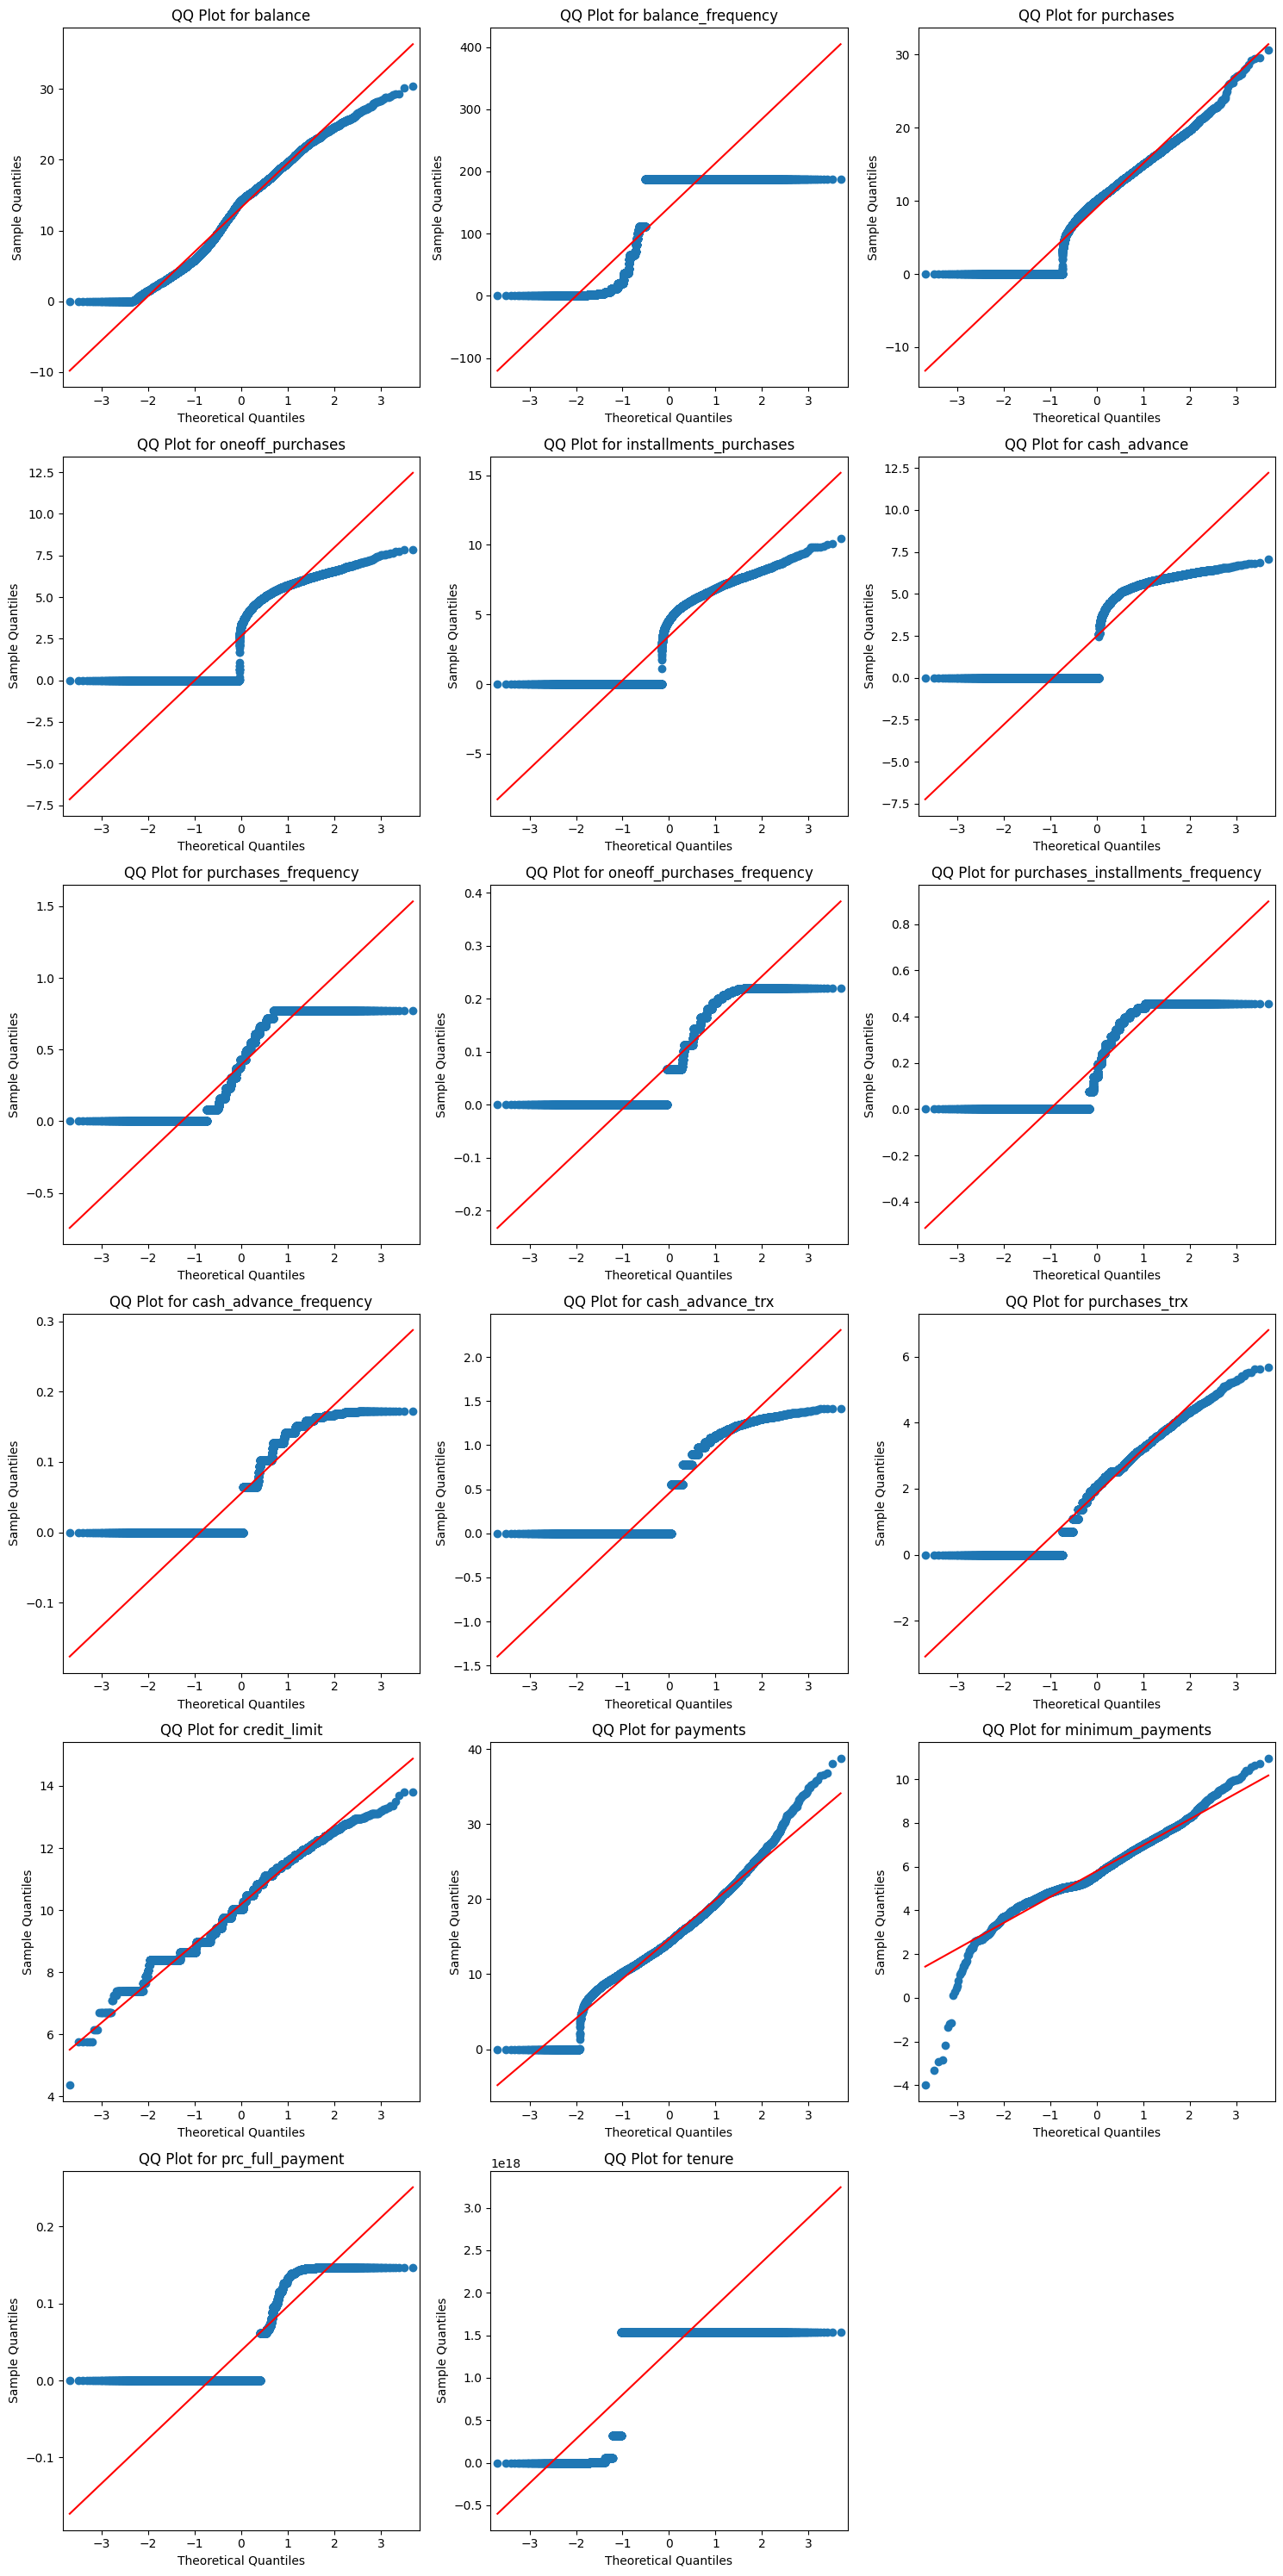

In [40]:
plot_qq_plots_side_by_side(df_boxcox)

In [41]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=488d4b3c27dc6a4fee9abc61c2b08ca706facd5e47260f124485b14e86e9c382
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


## Using Principle component analysis

*We will go with the heuristic approach of selecting the factors using PC's whose eigen value is greater than 1.*


*So we will consider the number of factors equal to 6.*

In [42]:
L_full=pd.DataFrame(index=df.columns)
for j in range(6):
  L_full[f"Factor {j+1}"]=math.sqrt(eigen_pairs_scaled[j][0])*normalized_eigenvectors_scaled[j]

In [43]:
L_full

Factor 1  Factor 2  Factor 3  Factor 4  \
balance                          -0.222383 -0.749115  0.199277  0.313372   
balance_frequency                -0.260802 -0.243925  0.519942  0.178317   
purchases                        -0.886744 -0.071574 -0.314665  0.051563   
oneoff_purchases                 -0.746347 -0.112482 -0.477257  0.104297   
installments_purchases           -0.725277  0.037532  0.132714 -0.069724   
cash_advance                      0.046613 -0.816105  0.024446 -0.295148   
purchases_frequency              -0.691115  0.356816  0.452704 -0.222816   
oneoff_purchases_frequency       -0.634478  0.036955 -0.141185  0.047036   
purchases_installments_frequency -0.590373  0.333082  0.572542 -0.262492   
cash_advance_frequency            0.187577 -0.808627  0.125478 -0.296088   
cash_advance_trx                  0.100700 -0.780028  0.131255 -0.373306   
purchases_trx                    -0.841318  0.039615  0.092494 -0.023303   
credit_limit                     -0.458388 -0.439549 -0.124187  0.146364   
payments                         -0.575039 -0.476039 -0.341242 -0.129112   
minimum_payments                 -0.135645 -0.315960  0.294933  0.439540   
prc_full_payment                 -0.282951  0.354200 -0.157519 -0.472233   
tenure                           -0.173007 -0.000132  0.089835  0.484330   

                                  Factor 5  Factor 6  
balance                          -0.059021 -0.040349  
balance_frequency                 0.485264 -0.028846  
purchases                        -0.032169 -0.176980  
oneoff_purchases                  0.162626 -0.178639  
installments_purchases           -0.374828 -0.090254  
cash_advance                     -0.094895  0.136311  
purchases_frequency               0.106853  0.044339  
oneoff_purchases_frequency        0.558264 -0.000081  
purchases_installments_frequency -0.179057  0.047862  
cash_advance_frequency            0.151992 -0.056347  
cash_advance_trx                  0.093137  0.059570  
purchases_trx                     0.036689 -0.098387  
credit_limit                     -0.089748  0.319389  
payments                         -0.203451  0.111246  
minimum_payments                 -0.425514 -0.282070  
prc_full_payment                 -0.138317  0.344348  
tenure                            0.004697  0.742061

**Factor rotation**

In [45]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=6, rotation='varimax', method = 'principal')
fa.fit(df_knn_scaled)

# Get the rotated factor loadings
rotated_loading = fa.loadings_

# Show the rotated factor loadings
loading_matrix = pd.DataFrame(rotated_loading, index=df_knn_scaled.columns, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6'])

loading_matrix

Factor 1  Factor 2  Factor 3  Factor 4  \
balance                           0.228827  0.512789 -0.050084  0.579363   
balance_frequency                 0.030581  0.179683  0.204866  0.167705   
purchases                         0.912326 -0.061059  0.285289  0.089003   
oneoff_purchases                  0.925052 -0.062493  0.020786 -0.012717   
installments_purchases            0.457517 -0.029647  0.636230  0.233699   
cash_advance                      0.043417  0.866621 -0.082586  0.100564   
purchases_frequency               0.208514 -0.174091  0.831239 -0.149632   
oneoff_purchases_frequency        0.629451 -0.093563  0.125801 -0.254239   
purchases_installments_frequency  0.034176 -0.118048  0.931610 -0.001941   
cash_advance_frequency           -0.066398  0.854263 -0.180896  0.090168   
cash_advance_trx                 -0.038995  0.877550 -0.066480  0.017259   
purchases_trx                     0.617974 -0.060896  0.550747  0.068700   
credit_limit                      0.457891  0.321586  0.067325  0.136952   
payments                          0.676624  0.420870  0.113399  0.055139   
minimum_payments                  0.041263  0.058841  0.107718  0.799265   
prc_full_payment                  0.131458 -0.073454  0.399890 -0.534091   
tenure                            0.001416 -0.120196  0.023361  0.023443   

                                  Factor 5  Factor 6  
balance                           0.218570  0.228899  
balance_frequency                 0.742476  0.106686  
purchases                        -0.009103  0.002470  
oneoff_purchases                  0.079305 -0.013687  
installments_purchases           -0.167300  0.030936  
cash_advance                     -0.091260  0.072916  
purchases_frequency               0.292185  0.020571  
oneoff_purchases_frequency        0.497490  0.069360  
purchases_installments_frequency  0.084875  0.018313  
cash_advance_frequency            0.162510 -0.131587  
cash_advance_trx                  0.092560 -0.049920  
purchases_trx                     0.186819  0.031102  
credit_limit                     -0.029966  0.461480  
payments                         -0.247982  0.178385  
minimum_payments                 -0.036406  0.046032  
prc_full_payment                 -0.336273  0.100601  
tenure                            0.103290  0.892771

**Factor 1**: Spending Behavior on Purchases  
- High loadings: purchases (0.912), oneoff_purchases (0.925), payments (0.677)  
- Moderate loadings: purchases_trx (0.618), credit_limit (0.458)  
- Interpretation: Reflects general spending behavior, particularly on frequent or high-value purchases.  

**Factor 2**: Cash Advance Usage  
- High loadings: cash_advance (0.867), cash_advance_frequency (0.854), cash_advance_trx (0.878)  
- Moderate loading: balance (0.513)  
- Interpretation: Represents reliance on cash advances, possibly indicating financial emergencies or liquidity issues.  

**Factor 3**: Installment Purchases and Frequency  
- High loadings: installments_purchases (0.636), purchases_frequency (0.831), purchases_installments_frequency (0.932)  
- Moderate loading: purchases_trx (0.551)  
- Interpretation: Highlights preference for installment-based spending and consistent card usage.  

**Factor 4**: Payment Delays or Minimum Payments  
- High loading: minimum_payments (0.799)  
- Moderate loading: balance (0.579)  
- Negative loading: prc_full_payment (-0.534)  
- Interpretation: Reflects payment behavior, particularly customers who make minimum payments or carry high balances, possibly signaling financial strain.  

**Factor 5**: Purchase and Spending Consistency  
- High loadings: balance_frequency (0.742), oneoff_purchases_frequency (0.497)  
- Moderate loading: purchases_frequency (0.292)  
- Interpretation: Represents consistent spending or card usage patterns, with occasional spikes in one-off purchases.  

**Factor 6**: Card Tenure and Credit Stability  
- High loading: tenure (0.893)  
- Moderate loading: credit_limit (0.461)  
- Interpretation: Captures card tenure and credit management, representing customers with long-standing credit card usage and higher credit limits.  


**Estimates of factor scores**

In [46]:
# Calculate factor scores using regression method
factor_scores = fa.transform(df_knn_scaled)

# Create a DataFrame for factor scores
factor_scores_df = pd.DataFrame(factor_scores, columns = [
    "Spending_Behavior",
    "Cash_Advance_Usage",
    "Installment_Spending",
    "Payment_Delays",
    "Spending_Consistency",
    "Card_Tenure_Stability"
]
)

# Concatenate factor scores with the original data (if needed)
# combined_df = pd.concat([df_knn_scaled, factor_scores_df], axis=1)

# Print or use the factor scores as needed
factor_scores_df.head()

Spending_Behavior  Cash_Advance_Usage  Installment_Spending  \
0          -0.451568           -0.798417             -0.755856   
1          -0.145461            1.337166             -0.677054   
2           0.607778           -0.667973             -0.690827   
3           0.375506           -0.548490             -1.264512   
4          -0.363936           -0.744178             -0.966145   

   Payment_Delays  Spending_Consistency  Card_Tenure_Stability  
0        0.054130             -0.212040               0.022942  
1        0.053621             -0.854851               0.991894  
2       -0.486071              2.015985               0.669871  
3        0.226459             -0.581433               0.496782  
4        0.136026              0.336442               0.141096

In [47]:
factor_scores_df.describe()

Spending_Behavior  Cash_Advance_Usage  Installment_Spending  \
count       8.942000e+03        8.942000e+03          8.942000e+03   
mean       -6.356902e-18       -3.973064e-18          3.973064e-17   
std         1.000056e+00        1.000056e+00          1.000056e+00   
min        -1.298054e+00       -3.313787e+00         -4.409498e+00   
25%        -4.754828e-01       -5.887084e-01         -8.787906e-01   
50%        -2.392941e-01       -3.297019e-01         -3.390354e-01   
75%         1.910879e-01        2.164614e-01          8.815108e-01   
max         2.020171e+01        1.732718e+01          7.027741e+00   

       Payment_Delays  Spending_Consistency  Card_Tenure_Stability  
count    8.942000e+03          8.942000e+03           8.942000e+03  
mean     3.178451e-18         -4.767677e-17           2.542761e-17  
std      1.000056e+00          1.000056e+00           1.000056e+00  
min     -2.941704e+00         -8.118483e+00          -4.388165e+00  
25%     -4.014042e-01         -4.796777e-01          -8.048841e-02  
50%     -2.005569e-02          2.251817e-01           1.517927e-01  
75%      2.993881e-01          5.511199e-01           4.815666e-01  
max      2.348231e+01          2.590026e+00           3.187986e+00

In [48]:
scaler = StandardScaler()
factor_scores_df_scaled = pd.DataFrame(scaler.fit_transform(factor_scores_df), columns=factor_scores_df.columns)
factor_scores_df_scaled.describe()

Spending_Behavior  Cash_Advance_Usage  Installment_Spending  \
count       8.942000e+03        8.942000e+03          8.942000e+03   
mean       -6.992592e-17        1.891178e-16          3.814141e-17   
std         1.000056e+00        1.000056e+00          1.000056e+00   
min        -1.298054e+00       -3.313787e+00         -4.409498e+00   
25%        -4.754828e-01       -5.887084e-01         -8.787906e-01   
50%        -2.392941e-01       -3.297019e-01         -3.390354e-01   
75%         1.910879e-01        2.164614e-01          8.815108e-01   
max         2.020171e+01        1.732718e+01          7.027741e+00   

       Payment_Delays  Spending_Consistency  Card_Tenure_Stability  
count    8.942000e+03          8.942000e+03           8.942000e+03  
mean    -1.589226e-17         -4.449831e-17           3.559865e-16  
std      1.000056e+00          1.000056e+00           1.000056e+00  
min     -2.941704e+00         -8.118483e+00          -4.388165e+00  
25%     -4.014042e-01         -4.796777e-01          -8.048841e-02  
50%     -2.005569e-02          2.251817e-01           1.517927e-01  
75%      2.993881e-01          5.511199e-01           4.815666e-01  
max      2.348231e+01          2.590026e+00           3.187986e+00

# Clustering

## Using PCA

### K-Means Clustering

In [49]:
from sklearn.cluster import KMeans

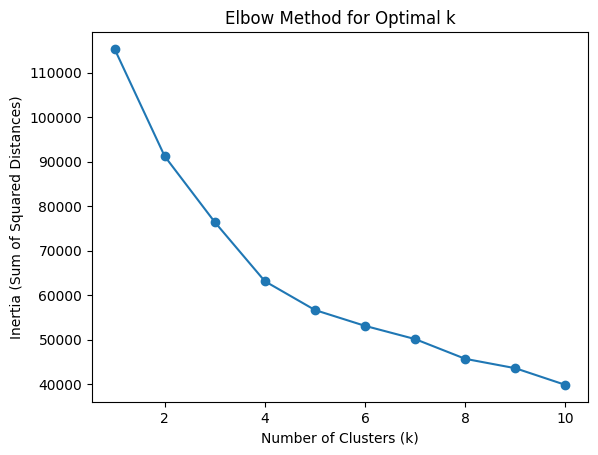

In [50]:
cluster_range = range(1, 11)
inertia_values = []
X=df_pca_scaled.loc[:,'pc1':'pc6']
# X.head()
# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

We can see that the elbow is formed at 4.

**Visualizing clusters**

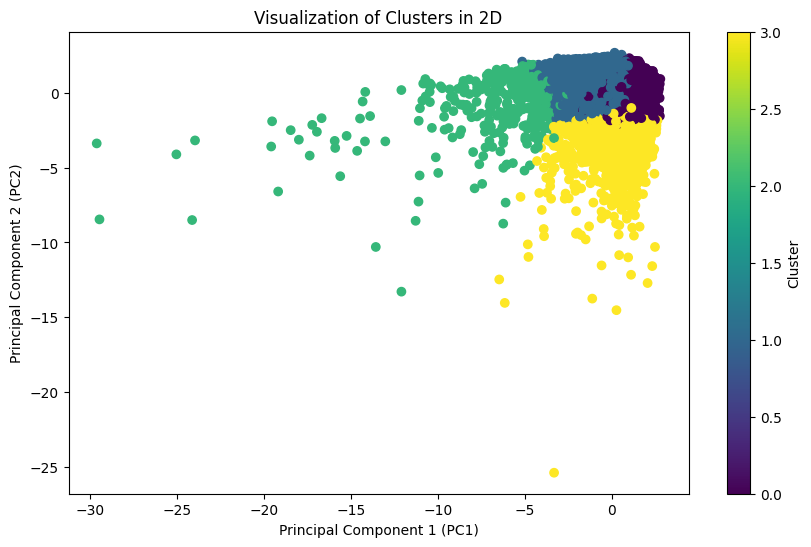

In [51]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Example with 4 clusters
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters in 2D using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X['pc1'], X['pc2'], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Visualization of Clusters in 2D')
plt.colorbar(label='Cluster')
plt.show()

In [52]:
from sklearn.cluster import KMeans
import plotly.express as px

n_clusters = 4  # Specify the number of clusters as desired

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['cluster'] = kmeans.fit_predict(X)  # Assign clusters to the DataFrame

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    X, x='pc1', y='pc2', z='pc3',
    color='cluster',  # Color by cluster label
    title="Interactive 3D Plot of K-Means Clustering",
    labels={'pc1': 'Principal Component 1', 'pc2': 'Principal Component 2', 'pc3': 'Principal Component 3'}
)

# Show the interactive plot
fig.show()

<ipython-input-52-d40764f336ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X)  # Assign clusters to the DataFrame


In [53]:
X

pc1       pc2       pc3       pc4       pc5       pc6  cluster
0     1.688070  1.065298 -0.467987  0.682690 -0.052681 -0.060398        0
1     1.129459 -2.521799 -0.606123 -0.131815 -0.649870  1.086895        3
2    -0.967794  0.387680 -0.082886  1.261953  2.162930  0.315022        1
3     0.887390 -0.015373 -1.482580  1.098316 -0.255084  0.180162        0
4     1.603160  0.677269 -0.337799  1.021439  0.439131 -0.075476        0
...        ...       ...       ...       ...       ...       ...      ...
8937  0.367149  2.029627  0.946801 -2.726946 -0.122158 -2.719165        1
8938  0.588695  1.702190  1.181908 -1.992943  0.088530 -3.331584        1
8939  0.933151  1.822913  0.432338 -2.278609 -0.238683 -3.017724        1
8940  2.339729  0.659914 -1.002453 -1.812854  0.059830 -3.215521        0
8941  0.559969  0.408590 -1.054662 -1.890806  1.439230 -3.711724        0

[8942 rows x 7 columns]

### Hierarchical Clustering

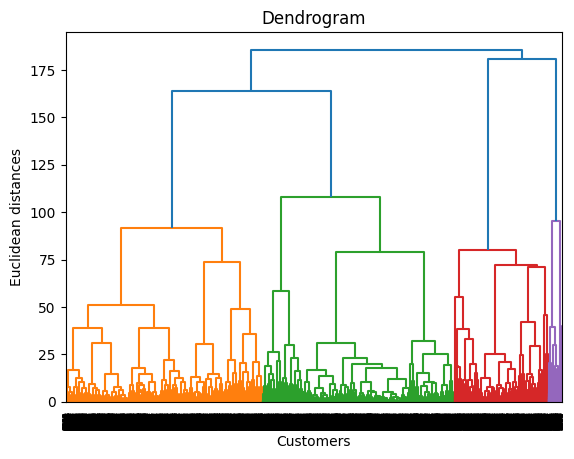

In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

X=df_pca_scaled.loc[:,'pc1':'pc6']

# Calculate the linkage matrix
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Customize the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

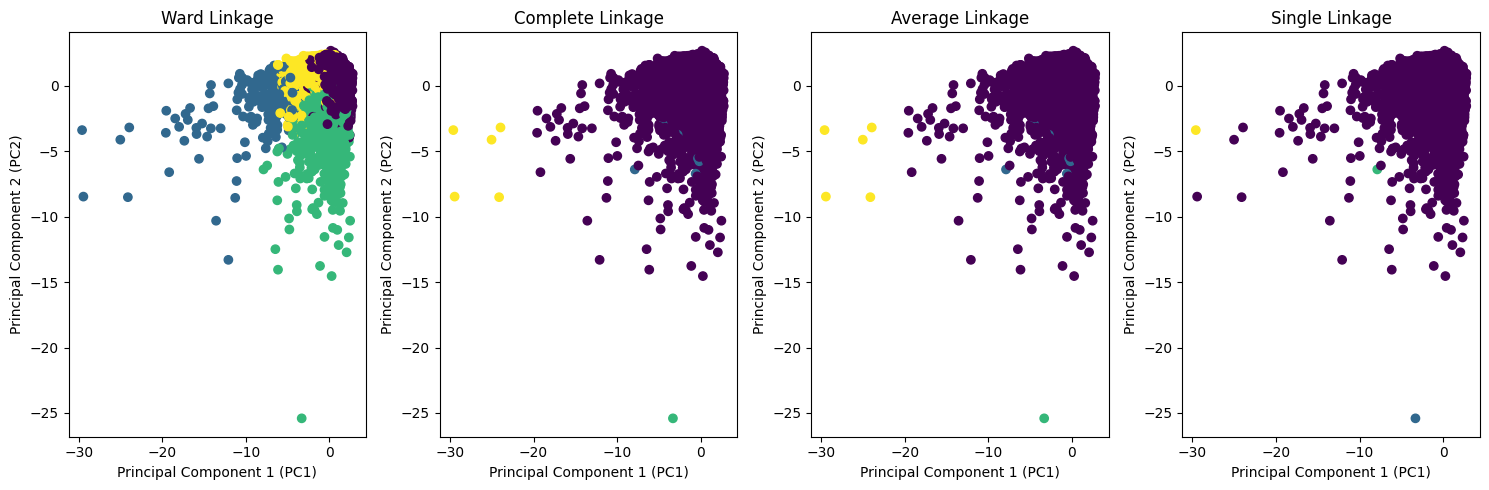

In [55]:
# Define the linkage methods you want to compare
linkage_methods = ['ward', 'complete', 'average', 'single']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, linkage in enumerate(linkage_methods):
    # Create the hierarchical clustering model
    model = AgglomerativeClustering(n_clusters=4, linkage=linkage)

    # Fit the model to the data
    model.fit(X)

    # Get the cluster labels
    labels = model.labels_

    # Visualize the clusters
    axes[i].scatter(X['pc1'], X['pc2'], c=labels, cmap='viridis')
    axes[i].set_xlabel('Principal Component 1 (PC1)')
    axes[i].set_ylabel('Principal Component 2 (PC2)')
    axes[i].set_title(f'{linkage.capitalize()} Linkage')


plt.tight_layout()
plt.show()

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Perform clustering using different linkage methods
linkages = ['ward', 'single', 'complete', 'average']
cluster_results = {}

for linkage in linkages:
    agg_cluster = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    labels = agg_cluster.fit_predict(X)
    cluster_results[linkage] = labels  # Store labels for each linkage type

# Create subplots with 2 rows and 2 columns for each linkage type
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=[f"Linkage: {linkage}" for linkage in linkages]
)

# Loop through each linkage type and add the 3D scatter plot to the subplot
for i, linkage in enumerate(linkages):
    labels = cluster_results[linkage]
    row = i // 2 + 1  # Determine the row index (1 or 2)
    col = i % 2 + 1   # Determine the column index (1 or 2)

    # Create a 3D scatter plot for the current linkage
    fig.add_trace(
        go.Scatter3d(
            x=X['pc1'], y=X['pc2'], z=X['pc3'],
            mode='markers',
            marker=dict(size=5, color=labels, colorscale='Viridis', opacity=0.8),
            text=[f"Cluster: {label}" for label in labels],
            name=f"Linkage: {linkage}"
        ),
        row=row, col=col
    )

# Update layout for the overall figure to increase size and adjust margins
fig.update_layout(
    title="3D Scatter Plots of Clustering with Different Linkage Methods",
    width=1200,  # Increase width
    height=800,  # Increase height
    margin=dict(l=10, r=10, t=50, b=10),  # Tighten margins around the plot
)

# Set axis titles for each subplot's scene
for i in range(1, 5):
    fig['layout'][f'scene{i}'].update(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )

fig.show()

In [57]:
X=df_pca_scaled.loc[:,'pc1':'pc6']

model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(X)
X['labels'] = model.labels_

<ipython-input-57-15301b122ab5>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
X

pc1       pc2       pc3       pc4       pc5       pc6  labels
0     1.688070  1.065298 -0.467987  0.682690 -0.052681 -0.060398       0
1     1.129459 -2.521799 -0.606123 -0.131815 -0.649870  1.086895       2
2    -0.967794  0.387680 -0.082886  1.261953  2.162930  0.315022       3
3     0.887390 -0.015373 -1.482580  1.098316 -0.255084  0.180162       0
4     1.603160  0.677269 -0.337799  1.021439  0.439131 -0.075476       0
...        ...       ...       ...       ...       ...       ...     ...
8937  0.367149  2.029627  0.946801 -2.726946 -0.122158 -2.719165       0
8938  0.588695  1.702190  1.181908 -1.992943  0.088530 -3.331584       0
8939  0.933151  1.822913  0.432338 -2.278609 -0.238683 -3.017724       0
8940  2.339729  0.659914 -1.002453 -1.812854  0.059830 -3.215521       0
8941  0.559969  0.408590 -1.054662 -1.890806  1.439230 -3.711724       0

[8942 rows x 7 columns]

## Using factor scores


### K-Means Clustering

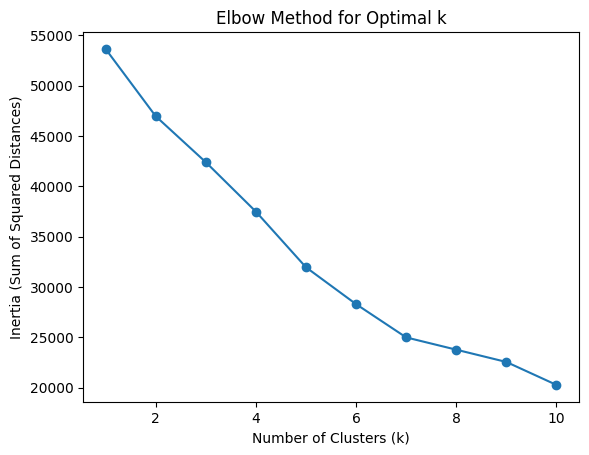

In [59]:
cluster_range = range(1, 11)
inertia_values = []
X=factor_scores_df
# X.head()
# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
X = factor_scores_df
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

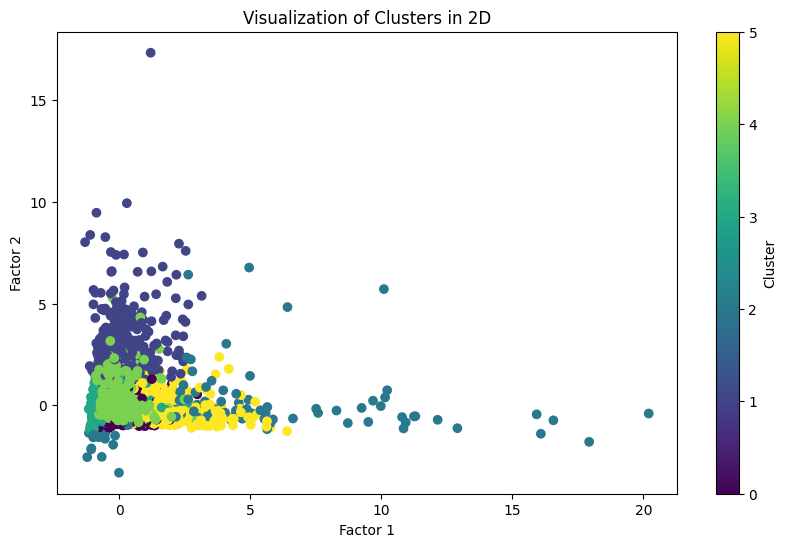

In [61]:
kmeans = KMeans(n_clusters=6, random_state=42)  # Example with 4 clusters
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters in 2D using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X['Spending_Behavior'], X['Cash_Advance_Usage'], c=cluster_labels, cmap='viridis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Visualization of Clusters in 2D')
plt.colorbar(label='Cluster')
plt.show()

In [62]:
from sklearn.cluster import KMeans
import plotly.express as px

n_clusters = 6  # Specify the number of clusters as desired

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['cluster'] = kmeans.fit_predict(X)  # Assign clusters to the DataFrame

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    X, x='Spending_Behavior', y='Cash_Advance_Usage', z='Installment_Spending',
    color='cluster',  # Color by cluster label
    title="Interactive 3D Plot of K-Means Clustering",
    labels={'Spending_Behavior': 'Spending_Behavior', 'Cash_Advance_Usage': 'Cash_Advance_Usage', 'Installment_Spending': 'Installment_Spending'}
)

# Show the interactive plot
fig.show()

### Hierarchical Clustering

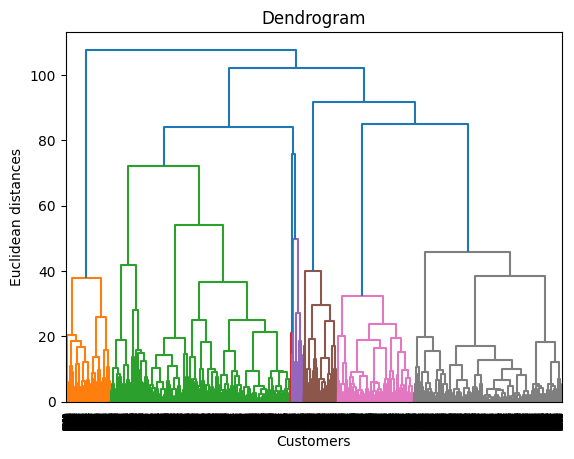

In [63]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

X=factor_scores_df

# Calculate the linkage matrix
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Customize the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

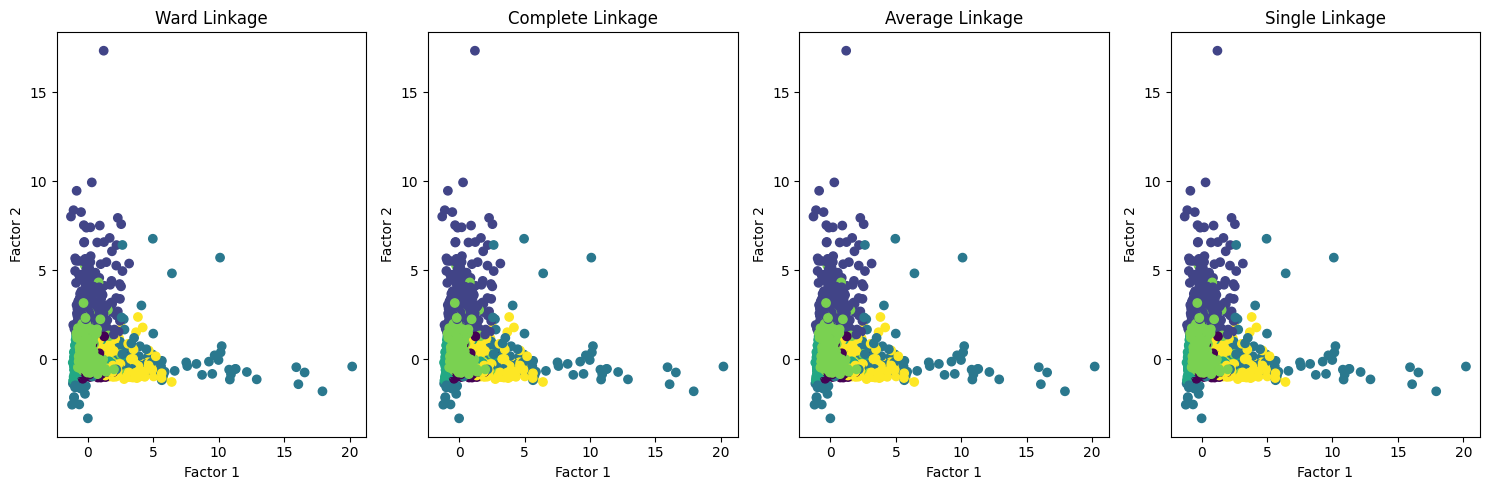

In [64]:
# Define the linkage methods you want to compare
linkage_methods = ['ward', 'complete', 'average', 'single']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, linkage in enumerate(linkage_methods):
    # Create the hierarchical clustering model
    model = AgglomerativeClustering(n_clusters=4, linkage=linkage)

    # Fit the model to the data
    model.fit(X)

    # Get the cluster labels
    labels = model.labels_

    # Visualize the clusters
    axes[i].scatter(X['Spending_Behavior'], X['Cash_Advance_Usage'], c=cluster_labels, cmap='viridis')
    axes[i].set_xlabel('Factor 1')
    axes[i].set_ylabel('Factor 2')
    axes[i].set_title(f'{linkage.capitalize()} Linkage')


plt.tight_layout()
plt.show()

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Perform clustering using different linkage methods
linkages = ['ward', 'single', 'complete', 'average']
cluster_results = {}

for linkage in linkages:
    agg_cluster = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    labels = agg_cluster.fit_predict(X)
    cluster_results[linkage] = labels  # Store labels for each linkage type

# Create subplots with 2 rows and 2 columns for each linkage type
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=[f"Linkage: {linkage}" for linkage in linkages]
)

# Loop through each linkage type and add the 3D scatter plot to the subplot
for i, linkage in enumerate(linkages):
    labels = cluster_results[linkage]
    row = i // 2 + 1  # Determine the row index (1 or 2)
    col = i % 2 + 1   # Determine the column index (1 or 2)

    # Create a 3D scatter plot for the current linkage
    fig.add_trace(
        go.Scatter3d(
            x=X['Spending_Behavior'], y=X['Cash_Advance_Usage'], z=X['Installment_Spending'],
            mode='markers',
            marker=dict(size=5, color=labels, colorscale='Viridis', opacity=0.8),
            text=[f"Cluster: {label}" for label in labels],
            name=f"Linkage: {linkage}"
        ),
        row=row, col=col
    )

# Update layout for the overall figure to increase size and adjust margins
fig.update_layout(
    title="3D Scatter Plots of Clustering with Different Linkage Methods",
    width=1200,  # Increase width
    height=800,  # Increase height
    margin=dict(l=10, r=10, t=50, b=10),  # Tighten margins around the plot
)

# Set axis titles for each subplot's scene
for i in range(1, 5):
    fig['layout'][f'scene{i}'].update(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )

fig.show()

In [66]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(X)
X['labels'] = model.labels_

In [67]:
X

Spending_Behavior  Cash_Advance_Usage  Installment_Spending  \
0             -0.451568           -0.798417             -0.755856   
1             -0.145461            1.337166             -0.677054   
2              0.607778           -0.667973             -0.690827   
3              0.375506           -0.548490             -1.264512   
4             -0.363936           -0.744178             -0.966145   
...                 ...                 ...                   ...   
8937          -0.514351           -0.100520              1.410200   
8938          -0.488646           -0.304226              1.080254   
8939          -0.393982           -0.269144              0.833404   
8940          -0.041204           -0.056093             -0.673386   
8941           0.871451           -0.005411             -0.623912   

      Payment_Delays  Spending_Consistency  Card_Tenure_Stability  labels  
0           0.054130             -0.212040               0.022942       0  
1           0.053621             -0.854851               0.991894       0  
2          -0.486071              2.015985               0.669871       0  
3           0.226459             -0.581433               0.496782       0  
4           0.136026              0.336442               0.141096       0  
...              ...                   ...                    ...     ...  
8937       -0.427781             -0.162185              -3.574464       3  
8938        0.257748              0.329569              -3.829927       3  
8939       -0.114554             -0.336772              -3.699605       3  
8940       -0.101046             -0.523227              -3.796017       3  
8941       -0.474518              0.744578              -4.220804       3  

[8942 rows x 7 columns]